# Long Term MHW Trends


Paper Section 3.3

In [1]:
import os
import pickle

import pandas as pd
import numpy as np
import xarray as xr
import scipy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [22]:
REPO_ROOT = '/Users/rwegener/repos/chesapeake_mhw/'
SAVE_FIGS = False

In [3]:
path = os.path.join(REPO_ROOT, 'data/interim', 'mhw_eventstats_dict_detrended.pickle')
with open(path, 'rb') as handle:
    event_statistics = pickle.load(handle)

## Calculating stats for each year

In [4]:
def no_annual_events(time_arr):
    '''
    counts the number of MHW in each year
    '''
    # getting the years from the start date
    f = lambda x: x.year
    years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
    # count the number of events for every year from 2003 to 2021
    # don't include 2002 or 2022 because we don't have the full time series
    year_counts = np.empty(len(range(2003, 2023)))
    for i, yr in enumerate(range(2003, 2023)):
        year_counts[i] = np.count_nonzero(years == yr)

    return year_counts

In [5]:
def total_no_mhw_days_yearly(time_arr):
    '''
    counts the number of MHW days in each year
    '''
    # getting the years from the start date
    f = lambda x: x.year
    years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
    # count the number of events for every year from 2003 to 2021
    # don't include 2002 or 2022 because we don't have the full time series
    year_counts = np.empty(len(range(2003, 2023)))
    # loop through each of the years we are analyzing
    for i, yr in enumerate(range(2003, 2023)):
        this_year_dur = []
        # go through each mhw in the list and check if the year is the current year
        for sample_year, duration  in zip(years, time_arr['duration']): 
            if sample_year == yr:
                # if the year is part of the current year, extract the value
                this_year_dur = np.append(this_year_dur, duration)
        # sum all the durations for that year and save it in year index i of year_counts
        year_counts[i] = np.sum(this_year_dur)

    return year_counts

The one below doesn't work right now because I can't figure out how to vectorize a function with multiple input arguments. Instead I've made a new function for each metric, but really most of the metrics could share a function if we could figure out how to get them to vectorize.

In [6]:
# def avg_annual_field(time_arr, field):
#     '''
#     average duration of mhw in each year
    
#     Parameters
#     ----------
#     field: string
#         The column from event_statstics that should be averaged over
#     '''
#     # getting the years from the start date
#     f = lambda x: x.year
#     years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
#     # count the number of events for every year from 2003 to 2021
#     # don't include 2002 or 2022 because we don't have the full time series
#     year_counts = np.empty(len(range(2003, 2023)))
#     # loop through each of the years we are analyzing
#     for i, yr in enumerate(range(2003, 2023)):
#         this_year = []
#         # go through each mhw in the list and check if the year is the current year
#         for sample_year, field  in zip(years, time_arr[field]): 
#             if sample_year == yr:
#                 # if the year is part of the current year, extract the value
#                 this_year = np.append(this_year, field)
#         # sum all the values for that year and save it in year index i of year_counts
#         annual_mean = np.mean(this_year)
#         if np.isnan(annual_mean):
#             annual_mean = 0
#         year_counts[i] = annual_mean
#     return year_counts

In [7]:
def avg_annual_duration(time_arr):
    '''
    average duration of mhw in each year
    
    Parameters
    ----------
    field: string
        The column from event_statstics that should be averaged over
    '''
    # getting the years from the start date
    f = lambda x: x.year
    years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
    # count the number of events for every year from 2003 to 2021
    # don't include 2002 or 2022 because we don't have the full time series
    year_counts = np.empty(len(range(2003, 2023)))
    # loop through each of the years we are analyzing
    for i, yr in enumerate(range(2003, 2023)):
        this_year = []
        # go through each mhw in the list and check if the year is the current year
        for sample_year, field  in zip(years, time_arr['duration']): 
            if sample_year == yr:
                # if the year is part of the current year, extract the value
                this_year = np.append(this_year, field)
        # sum all the values for that year and save it in year index i of year_counts
        annual_mean = np.mean(this_year)
        if np.isnan(annual_mean):
            annual_mean = 0
        year_counts[i] = annual_mean
    return year_counts

In [8]:
def avg_annual_maxintensity(time_arr):
    '''
    average duration of mhw in each year
    
    Parameters
    ----------
    field: string
        The column from event_statstics that should be averaged over
    '''
    # getting the years from the start date
    f = lambda x: x.year
    years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
    # count the number of events for every year from 2003 to 2021
    # don't include 2002 or 2022 because we don't have the full time series
    year_counts = np.empty(len(range(2003, 2023)))
    # loop through each of the years we are analyzing
    for i, yr in enumerate(range(2003, 2023)):
        this_year = []
        # go through each mhw in the list and check if the year is the current year
        for sample_year, field  in zip(years, time_arr['intensity_max']): 
            if sample_year == yr:
                # if the year is part of the current year, extract the value
                this_year = np.append(this_year, field)
        # sum all the values for that year and save it in year index i of year_counts
        annual_mean = np.mean(this_year)
        if np.isnan(annual_mean):
            annual_mean = 0
        year_counts[i] = annual_mean
    return year_counts

In [9]:
def avg_annual_cumintensity(time_arr):
    '''
    average duration of mhw in each year
    
    Parameters
    ----------
    field: string
        The column from event_statstics that should be averaged over
    '''
    # getting the years from the start date
    f = lambda x: x.year
    years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
    # count the number of events for every year from 2003 to 2021
    # don't include 2002 or 2022 because we don't have the full time series
    year_counts = np.empty(len(range(2003, 2023)))
    # loop through each of the years we are analyzing
    for i, yr in enumerate(range(2003, 2023)):
        this_year = []
        # go through each mhw in the list and check if the year is the current year
        for sample_year, field  in zip(years, time_arr['intensity_cumulative']): 
            if sample_year == yr:
                # if the year is part of the current year, extract the value
                this_year = np.append(this_year, field)
        # sum all the values for that year and save it in year index i of year_counts
        annual_mean = np.mean(this_year)
        if np.isnan(annual_mean):
            annual_mean = 0
        year_counts[i] = annual_mean
    return year_counts

In [10]:
def avg_annual_rate_onset(time_arr):
    '''
    average duration of mhw in each year
    
    Parameters
    ----------
    field: string
        The column from event_statstics that should be averaged over
    '''
    # getting the years from the start date
    f = lambda x: x.year
    years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
    # count the number of events for every year from 2003 to 2021
    # don't include 2002 or 2022 because we don't have the full time series
    year_counts = np.empty(len(range(2003, 2023)))
    # loop through each of the years we are analyzing
    for i, yr in enumerate(range(2003, 2023)):
        this_year = []
        # go through each mhw in the list and check if the year is the current year
        for sample_year, field  in zip(years, time_arr['rate_onset']): 
            if sample_year == yr:
                # if the year is part of the current year, extract the value
                this_year = np.append(this_year, field)
        # sum all the values for that year and save it in year index i of year_counts
        annual_mean = np.mean(this_year)
        if np.isnan(annual_mean):
            annual_mean = 0
        year_counts[i] = annual_mean
    return year_counts

In [11]:
def avg_annual_rate_decline(time_arr):
    '''
    average duration of mhw in each year
    
    Parameters
    ----------
    field: string
        The column from event_statstics that should be averaged over
    '''
    # getting the years from the start date
    f = lambda x: x.year
    years = np.vectorize(f, otypes=[int])(time_arr['date_start'])
    
    # count the number of events for every year from 2003 to 2021
    # don't include 2002 or 2022 because we don't have the full time series
    year_counts = np.empty(len(range(2003, 2023)))
    # loop through each of the years we are analyzing
    for i, yr in enumerate(range(2003, 2023)):
        this_year = []
        # go through each mhw in the list and check if the year is the current year
        for sample_year, field  in zip(years, time_arr['rate_decline']): 
            if sample_year == yr:
                # if the year is part of the current year, extract the value
                this_year = np.append(this_year, field)
        # sum all the values for that year and save it in year index i of year_counts
        annual_mean = np.mean(this_year)
        if np.isnan(annual_mean):
            annual_mean = 0
        year_counts[i] = annual_mean
    return year_counts

In [12]:
yearly_events = np.vectorize(no_annual_events, signature='()->(n)')(event_statistics)
mhw_days = np.vectorize(total_no_mhw_days_yearly, signature='()->(n)')(event_statistics)
avg_duration = np.vectorize(avg_annual_duration, signature='()->(n)')(event_statistics)
avg_max_intensity = np.vectorize(avg_annual_maxintensity, signature='()->(n)')(event_statistics)
avg_cum_intensity = np.vectorize(avg_annual_cumintensity, signature='()->(n)')(event_statistics)
avg_rate_onset = np.vectorize(avg_annual_rate_onset, signature='()->(n)')(event_statistics)
avg_rate_decline = np.vectorize(avg_annual_rate_decline, signature='()->(n)')(event_statistics)

/Users/rwegener/miniconda3/envs/chesapeake_mhw_2021dask/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/rwegener/miniconda3/envs/chesapeake_mhw_2021dask/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


## Trends (Multiple Hypothesis Testing)

In [13]:
def multiple_hypothesis(array):
    '''
    array is input array of shape x, y, t where x and y are spatial dimensions and t is time
    '''
    x = range(2003, 2023) # vector of length n, for me this is the time dimension
    y = np.transpose(array, (2, 0, 1)) # array of shape (n, m, l) where m and l are my spatial dimensions and which make up the multiple hypotheses. it is probably more general to make it into shape (n, m*l)

    slopes = np.zeros(y.shape[1:])
    p_values = np.zeros(y.shape[1:])

    for i in range(slopes.shape[0]):
        for j in range(slopes.shape[1]):
            slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y[:,i,j])
            slopes[i,j] = slope     # days/year
            p_values[i,j] = p_value

    sort_ids = np.argsort(p_values.ravel())
    reverse_sort_ids = np.argsort(sort_ids)
    sorted_pvalues = p_values.ravel()[sort_ids]
    
    S = len(sorted_pvalues)
    s = np.arange(1,S+1)
    gamma = 0.1
    BH_list_01 = s*0.1/S
    BH_list_02 = s*0.2/S
    BH_list_03 = s*0.3/S
    BH_list_04 = s*0.4/S
    
    trend = slopes.reshape((y.shape[1],y.shape[2]))*10. # m/s/year -> m/s/decade

    FDR_10_bool_sorted = sorted_pvalues<BH_list_01
    FDR_10_bool = FDR_10_bool_sorted[reverse_sort_ids]
    FDR_10_bool = FDR_10_bool.reshape(p_values.shape[0],p_values.shape[1])

    trend_masked_10 = np.ma.masked_array(trend, mask=~FDR_10_bool)
    return trend_masked_10

In [14]:
yearly_events_trend10 = multiple_hypothesis(yearly_events)
mhw_days_trend10 = multiple_hypothesis(mhw_days)
avg_duration_trend10 = multiple_hypothesis(avg_duration)
avg_maxintensity_trend10 = multiple_hypothesis(avg_max_intensity)
avg_cumintensity_trend10 = multiple_hypothesis(avg_cum_intensity)
avg_rate_onset_trend10 = multiple_hypothesis(avg_rate_onset)
avg_rate_decline_trend10 = multiple_hypothesis(avg_rate_decline)

In [15]:
# opening an existing file for coordinates
path = os.path.join(REPO_ROOT, 'data/processed/mhw_stats_outputs', 
                    'average_mean_intensity_CBay_geopolar.nc')
avg_mean_intensity = xr.open_dataset(path).avg_mean_intensity

In [40]:
yearly_events_slope_da = xr.DataArray(yearly_events_trend10, coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
mhw_days_slope_da = xr.DataArray(mhw_days_trend10, coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
avg_duration_slope_da = xr.DataArray(avg_duration_trend10, coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
avg_maxi_slope_da = xr.DataArray(avg_maxintensity_trend10, coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
avg_cumi_slope_da = xr.DataArray(avg_cumintensity_trend10, coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
avg_rate_onset_slope_da = xr.DataArray(avg_rate_onset_trend10, coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
avg_rate_decline_slope_da = xr.DataArray(avg_rate_decline_trend10, coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])

### Trends (Linear Regression) [SKIP]

In [23]:
def linear_regression_wrapper(arr, max_pval):
    """ Calculate the linear regression along 20 years and return just the slope
    of the line, if the p_value is above a threshold value
    """
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(range(20), arr)
    # filter out points that aren't significant
    if p_value > max_pval:
        slope = np.nan

    return slope

In [24]:
yearly_events_slope = np.apply_along_axis(linear_regression_wrapper, 2, yearly_events, 0.05)
mhw_days_slope = np.apply_along_axis(linear_regression_wrapper, 2, mhw_days, 0.05)
avg_duration_slope = np.apply_along_axis(linear_regression_wrapper, 2, avg_duration, 0.05)
avg_maxi_slope = np.apply_along_axis(linear_regression_wrapper, 2, avg_max_intensity, 0.05)
avg_cumi_slope = np.apply_along_axis(linear_regression_wrapper, 2, avg_cum_intensity, 0.05)
avg_rate_onset_slope = np.apply_along_axis(linear_regression_wrapper, 2, avg_rate_onset, 0.05)
avg_rate_decline_slope = np.apply_along_axis(linear_regression_wrapper, 2, avg_rate_decline, 0.05)

In [25]:
# opening an existing file for coordinates
path = os.path.join(REPO_ROOT, 'data/processed/mhw_stats_outputs', 
                    'average_mean_intensity_CBay_geopolar.nc')
avg_mean_intensity = xr.open_dataset(path).avg_mean_intensity

In [42]:
yearly_events_slope_da = xr.DataArray(yearly_events_slope,coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
mhw_days_slope_da = xr.DataArray(mhw_days_slope,coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
avg_duration_slope_da = xr.DataArray(avg_duration_slope,coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
avg_maxi_slope_da = xr.DataArray(avg_maxi_slope,coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
avg_cumi_slope_da = xr.DataArray(avg_cumi_slope,coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
avg_rate_onset_slope_da = xr.DataArray(avg_rate_onset_slope,coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])
avg_rate_decline_slope_da = xr.DataArray(avg_rate_decline_slope, coords=[avg_mean_intensity.latitude.values, avg_mean_intensity.longitude.values], 
             dims=['latitude', 'longitude'])

## Plotting

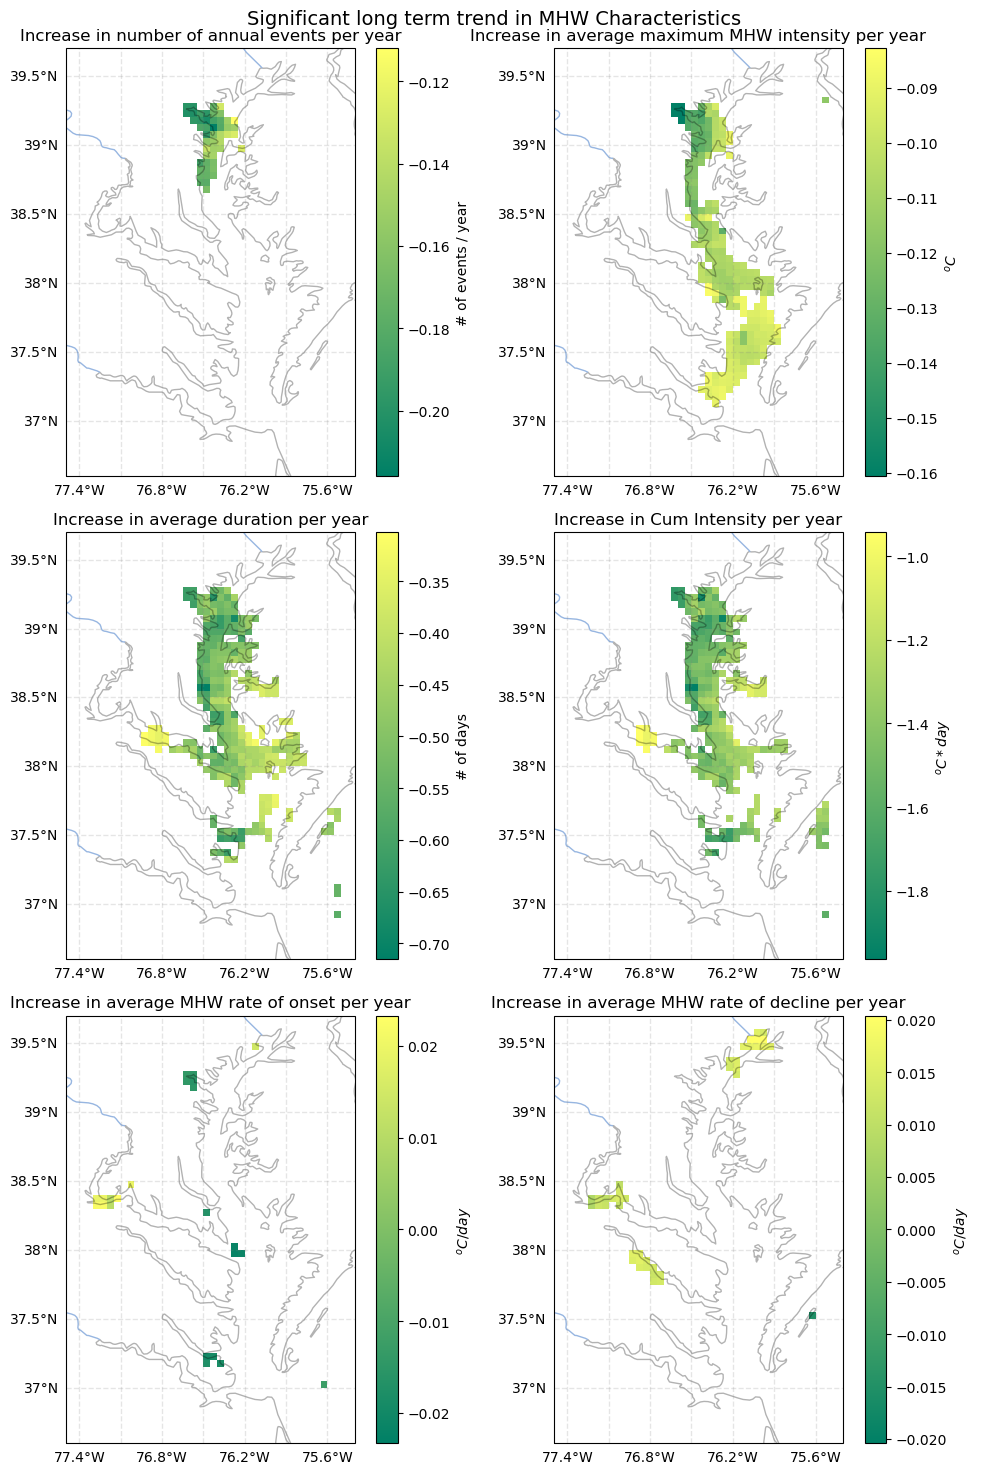

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15), subplot_kw={'projection': ccrs.PlateCarree()})
fig.suptitle('Significant long term trend in MHW Characteristics', size=14)

for ax in axes.flatten():
    # Add background features
    ax.add_feature(cfeature.COASTLINE, alpha=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.RIVERS)

    ax.set_extent([-77.5, -75.4, 36.6, 39.7])

    # Add and format gridlines. Remove top and right labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.2, linestyle='--')
    gl.top_labels, gl.right_labels = False, False


# Number of annual events
yearly_events_slope_da.plot(ax=axes[0, 0], cmap='summer', 
                            cbar_kwargs={'label': '# of events / year'})
axes[0, 0].set_title('Increase in number of annual events per year')

# Maximum intensity
avg_maxi_slope_da.plot(ax=axes[0, 1], cmap='summer', 
                       cbar_kwargs={'label': '$^oC$'})
axes[0, 1].set_title('Increase in average maximum MHW intensity per year')

# Average duration
avg_duration_slope_da.plot(ax=axes[1, 0], cmap='summer', 
                            cbar_kwargs={'label': '# of days'})
axes[1, 0].set_title('Increase in average duration per year')

# Cumulative Intensity
avg_cumi_slope_da.plot(ax=axes[1, 1], cmap='summer', 
                            cbar_kwargs={'label': '$^oC * day$'})
axes[1, 1].set_title('Increase in Cum Intensity per year')

# Rate of onset
avg_rate_onset_slope_da.plot(ax=axes[2, 0], cmap='summer',
                             cbar_kwargs={'label': '$^oC/day$'})
axes[2, 0].set_title('Increase in average MHW rate of onset per year')

# Rate of decline
avg_rate_decline_slope_da.plot(ax=axes[2, 1], cmap='summer', 
                               cbar_kwargs={'label': '$^oC/day$'})
axes[2, 1].set_title('Increase in average MHW rate of decline per year')

plt.tight_layout()

if SAVE_FIGS:
    plt.savefig(os.path.join(
        REPO_ROOT,
        'figures',
        'mhw_longterm_trends_multiple_hypothesis_detrended.pdf'
    ), 
                bbox_inches='tight', dpi=500)

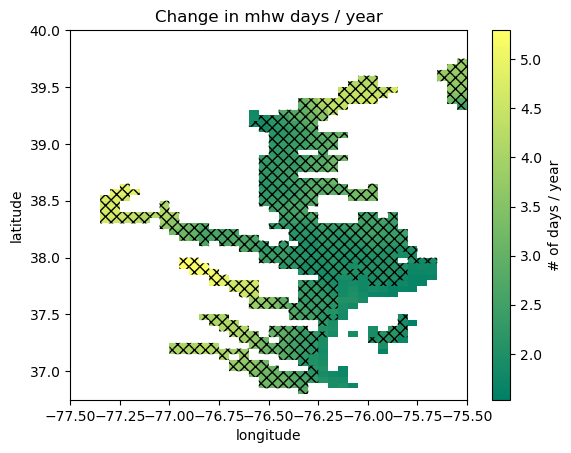

In [31]:
# Where does this fit into the analysis?
mhw_days_slope_da.plot( cmap='summer', cbar_kwargs={'label': '# of days / year'})
plt.title('Change in mhw days / year')
plt.pcolor(avg_mean_intensity['longitude'], avg_mean_intensity['latitude'], 
          mhw_days_trend10, hatch='xxx', alpha=0.,)

## Multiple Hypothesis Testing

In [26]:
from scipy import stats

In [27]:
# import plotly.graph_objects as go

In [28]:
x = range(2003, 2023) # vector of length n, for me this is the time dimension
y = np.transpose(yearly_events, (2, 0, 1)) # array of shape (n, m, l) where m and l are my spatial dimensions and which make up the multiple hypotheses. it is probably more general to make it into shape (n, m*l)

slopes = np.zeros(y.shape[1:])
p_values = np.zeros(y.shape[1:])

for i in range(slopes.shape[0]):
    for j in range(slopes.shape[1]):
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y[:,i,j])
        slopes[i,j] = slope     # days/year
        p_values[i,j] = p_value

sort_ids = np.argsort(p_values.ravel())
reverse_sort_ids = np.argsort(sort_ids)
sorted_pvalues = p_values.ravel()[sort_ids]

It's not going to screw this up that I have lots of land cells, is it?

In [29]:
S = len(sorted_pvalues)
s = np.arange(1,S+1)
gamma = 0.1
BH_list_01 = s*0.1/S
BH_list_02 = s*0.2/S
BH_list_03 = s*0.3/S
BH_list_04 = s*0.4/S

fig = go.Figure()

fig.add_trace(go.Scatter(x=s, y=BH_list_01,
                             mode='lines',
                             name='FDR = 10%'))

fig.add_trace(go.Scatter(x=s, y=BH_list_02,
                             mode='lines',
                             name='FDR = 20%'))

fig.add_trace(go.Scatter(x=s, y=BH_list_03,
                             mode='lines',
                             name='FDR = 30%'))

fig.add_trace(go.Scatter(x=s, y=BH_list_04,
                             mode='lines',
                             name='FDR = 40%'))

fig.add_trace(go.Scatter(x=s, y=sorted_pvalues,
                             mode='lines',
                             name='P values'))

fig.show()

NameError: name 'go' is not defined

In [31]:
trend = slopes.reshape((y.shape[1],y.shape[2]))*10. # m/s/year -> m/s/decade

FDR_10_bool_sorted = sorted_pvalues<BH_list_01
FDR_10_bool = FDR_10_bool_sorted[reverse_sort_ids]
FDR_10_bool = FDR_10_bool.reshape(p_values.shape[0],p_values.shape[1])

trend_masked_10 = np.ma.masked_array(trend, mask=~FDR_10_bool)

In [32]:
trend_masked_10.shape

(65, 40)

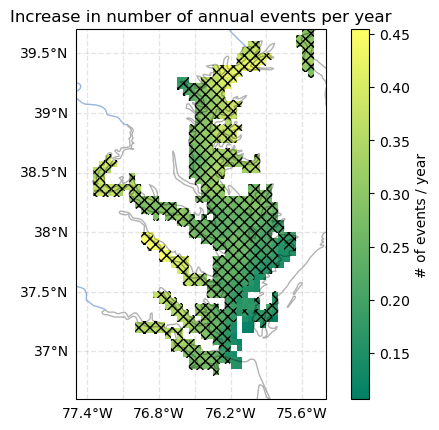

In [33]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
# ax=plt.axes()

# Add background features
ax.add_feature(cfeature.COASTLINE, alpha=0.3)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)

ax.set_extent([-77.5, -75.4, 36.6, 39.7])

# Add and format gridlines. Remove top and right labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.2, linestyle='--')
gl.top_labels, gl.right_labels = False, False

yearly_events_slope_da.plot(ax=ax, cmap='summer', cbar_kwargs={'label': '# of events / year'})
ax.set_title('Increase in number of annual events per year')

ax.pcolor(avg_mean_intensity['longitude'], avg_mean_intensity['latitude'], 
          trend_masked_10, hatch='xxx', alpha=0.,
          transform=ccrs.PlateCarree())

Making all that into a function

## Old Plots

### Plot over Time

Averaging (not summing) over all the pixels)

In [ ]:
mhw_days_annual_mean = mhw_days.mean(axis=0).mean(axis=0)

In [ ]:
plt.plot(pd.date_range('2003', '2022', freq='YS'), mhw_days_annual_mean, marker='o')
plt.xlabel('Year')
plt.ylabel('# of MHW days per year')
plt.title('Number of MHW days over Time')

plt.grid(axis='y', linestyle='--')
# plt.ylim([0, 22])

plt.savefig('figures/mhw_days_timeseries.png')

# Full Bay MHW days

MOVE TO ANALYSIS NOTEBOOK

Mazzini -- 2 MWH / year, 11 day avg duration, 22 MHW days / year

In [ ]:
avg_no_annual_events = xr.open_dataset('data/processed/mhw_stats_outputs/average_no_annual_events_CBay_geopolar.nc').avg_no_annual_events
avg_mean_intensity = xr.open_dataset('data/processed/mhw_stats_outputs/average_mean_intensity_CBay_geopolar.nc').avg_mean_intensity
avg_duration = xr.open_dataset('data/processed/mhw_stats_outputs/average_mhw_duration_CBay_geopolar.nc').avg_duration


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': ccrs.PlateCarree()})

for ax in axes:
    # Add background features
    ax.add_feature(cfeature.COASTLINE, alpha=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.RIVERS)

    ax.set_extent([-77.5, -75.4, 36.6, 39.7])

    # Add and format gridlines. Remove top and right labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=1, color='gray', alpha=0.2, linestyle='--')
    gl.top_labels, gl.right_labels = False, False

(avg_no_annual_events * avg_duration).plot(ax=axes[0])
axes[0].set_title('Average # of MHW Days')
avg_no_annual_events.plot(ax=axes[1])
axes[1].set_title('Average # of MHW per Year')
avg_duration.plot(ax=axes[2])
axes[2].set_title('Average MHW Duration')


plt.tight_layout()
plt.savefig('./figures/averge_mhw_days.png')

### Because that duration thing really bothers me

A cute little thing I just did but I don't think it took my anywhere

In [ ]:
# 0, 39 is the bottom right corner
avg_duration.isel(latitude=0, longitude=39).values
# event_statistics[0, 39]

In [ ]:
# UPPER BAY POINT
avg_duration.isel(latitude=47, longitude=23).values

In [ ]:
# LOWER BAY POINT
avg_duration.isel(latitude=15, longitude=27).values

In [ ]:
event_statistics.shape

In [ ]:
upper_starts = event_statistics[45, 25]['date_start']
upper_ends = event_statistics[45, 25]['date_end']
lower_starts = event_statistics[15, 25]['date_start']
lower_ends = event_statistics[15, 25]['date_end']

In [ ]:
plt.figure(figsize=(30,5))

# upper will be at y = 1, lower will be at y = 2
x1, y1 = [upper_starts[0], upper_ends[0]], [1]*2
x2, y2 = [lower_starts[0], lower_ends[0]], [1.2]*2
plt.plot(x1, y1, x2, y2, marker='o')

In [ ]:
plt.figure(figsize=(60,1))

# upper will be at y = 1.2, lower will be at y = 1
for i in range(len(upper_starts)):
    x1, y1 = [upper_starts[i], upper_ends[i]], [1.2]*2
    plt.plot(x1, y1, marker='o')

for i in range(len(lower_starts)):
    x1, y1 = [lower_starts[i], lower_ends[i]], [1]*2
    plt.plot(x1, y1, marker='o')

plt.savefig('./scratch.png')

In [ ]:
all_days = pd.date_range('2002-01-01', '2022-12-31')
events_upper = pd.DataFrame({'MHW': len(upper_starts)*[1]}, index=pd.to_datetime(upper_starts)).reindex(all_days)
events_lower = pd.DataFrame({'MHW': len(upper_starts)*[1]}, index=pd.to_datetime(upper_starts)).reindex(all_days)

In [ ]:
events_upper

# Looking at start date

In [ ]:
len(event_statistics[25, 25]['date_start'])

In [ ]:
def monthly_start_dates(time_arr):
    starts = pd.DataFrame({'date_start': pd.to_datetime(time_arr['date_start'])})
    monthly = starts.groupby(starts['date_start'].dt.month).count()['date_start']
    # Reindex to a full 12 months, in case there are missing months 
    # (land values have all missing months)
    monthly = monthly.reindex(range(1, 13))
    return monthly.values

In [ ]:
monthly_start_dates(event_statistics[0,0]).shape

In [ ]:
# total # of pixels
print('max ', event_statistics.size)

In [ ]:
# The number of mhw that started in that month, time series plotted for all the pixels
plt.figure()
for i in range(monthly_starts.shape[0]):
    for j in range(monthly_starts.shape[1]):
        plt.plot(range(1, 13), monthly_starts[i, j])
plt.show()

In [ ]:
# The number of mhw that started in that month, time series plotted for all the pixels
plt.figure()
for i in range(monthly_starts.shape[0]):
    for j in range(monthly_starts.shape[1]):
        plt.scatter(range(1, 13), monthly_starts[i, j], color='blue', alpha=0.02)
plt.show()

In [ ]:
time_arr = event_statistics[25, 25]

In [ ]:
time_df = pd.DataFrame({'date_start': pd.to_datetime(time_arr['date_start'])})

In [ ]:
months = time_df.groupby([pd.cut(time_df['date_start'].dt.year, [2002, 2007, 2012, 2017, 2022]), time_df['date_start'].dt.month]).count()


In [ ]:
hacking = months.swaplevel(0, 1).sort_index(1)

In [ ]:
fig, ax = plt.subplots()

hacking.iloc[:12].plot(color='yellow', ax=ax)
hacking.iloc[12:24].plot(color='orange', ax=ax)
hacking.iloc[24:36].plot(color='red', ax=ax)
hacking.iloc[36:48].plot(color='red', ax=ax)